# Importing the libraries

In [1]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.externals import joblib
from sklearn.decomposition import TruncatedSVD
from google.colab import drive

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Mounting Google Drive locally

In [2]:
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab Notebooks/DS102'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Model


# Importing the dataset

In [3]:
dataset = pd.read_csv('./clean_data/cleaned_data.csv')

In [4]:
def remove_(text):
    return text.replace('_', ' ')
    
dataset['comment'] = dataset['comment'].apply(lambda x: remove_(x))

# Split the data into training, validation & test sets

In [5]:
X = dataset.loc[:, 'comment']
Y = dataset.loc[:, 'label']
X_data, X_test, Y_data, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 42, stratify = Y)
X_train, X_val, Y_train, Y_val = train_test_split(X_data, Y_data, train_size = 0.9, random_state = 42, stratify = Y_data)

# Creating the TFIDF model

In [6]:
tfidf_vect = TfidfVectorizer(
    analyzer='word', max_features=20000, ngram_range=(1, 2))
X_train = tfidf_vect.fit_transform(X_train)
X_test = tfidf_vect.transform(X_test)

In [7]:
svd = TruncatedSVD(n_components=300, random_state=42)
X_train = svd.fit_transform(X_train)
X_test = svd.transform(X_test)

Label Encoder

In [8]:
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
Y_test = encoder.fit_transform(Y_test)

# Training model on the Training set

LogisticRegression

In [9]:
LR_clf = LogisticRegression(random_state=42)
LR_clf.fit(X_train, Y_train)
joblib.dump(LR_clf, './Model/LR_clf.pkl')

['./LR_clf.pkl']

KNeighborsClassifier

In [10]:
kNN_clf = KNeighborsClassifier()
kNN_clf.fit(X_train, Y_train)
joblib.dump(kNN_clf, './Model/kNN_clf.pkl')

['./kNN_clf.pkl']

SVC linear Kernel

In [11]:
linearSVM_clf = SVC(kernel='linear', random_state=42)
linearSVM_clf.fit(X_train, Y_train)
joblib.dump(linearSVM_clf, './Model/linearSVM_clf.pkl')

['./linearSVM_clf.pkl']

RandomForestClassifier

In [12]:
RF_clf = RandomForestClassifier(criterion='entropy', random_state=42)
RF_clf.fit(X_train, Y_train)
joblib.dump(RF_clf, './Model/RF_clf.pkl')

['./RF_clf.pkl']

In [13]:
def makeConfusionMatrix(model, X_, Y_, categories=[], sum_stats=True, title=None, avge='macro', ohe = False):
    if ohe:
      y_true = np.argmax(Y_, axis = 1)
      y_pred = np.argmax(model.predict_generator(X_), axis=1)
    else:
      y_true = Y_
      y_pred = model.predict(X_)
    cm = confusion_matrix(y_true, y_pred)
    if sum_stats:
        accuracy_metric = accuracy_score(y_true, y_pred)
        precision_metric = precision_score(y_true, y_pred, average=avge)
        recall_metric = recall_score(y_true, y_pred, average=avge)
        f1_metric = f1_score(y_true, y_pred, average=avge)
        stats_text = '\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}'.format(
            accuracy_metric, precision_metric, recall_metric, f1_metric)
    else:
        stats_text = ''
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=categories, yticklabels=categories, annot_kws={'size': 15})
    plt.ylabel('True label')
    plt.xlabel('Predicted label' + stats_text)
    plt.title(title)

# Evaluate model

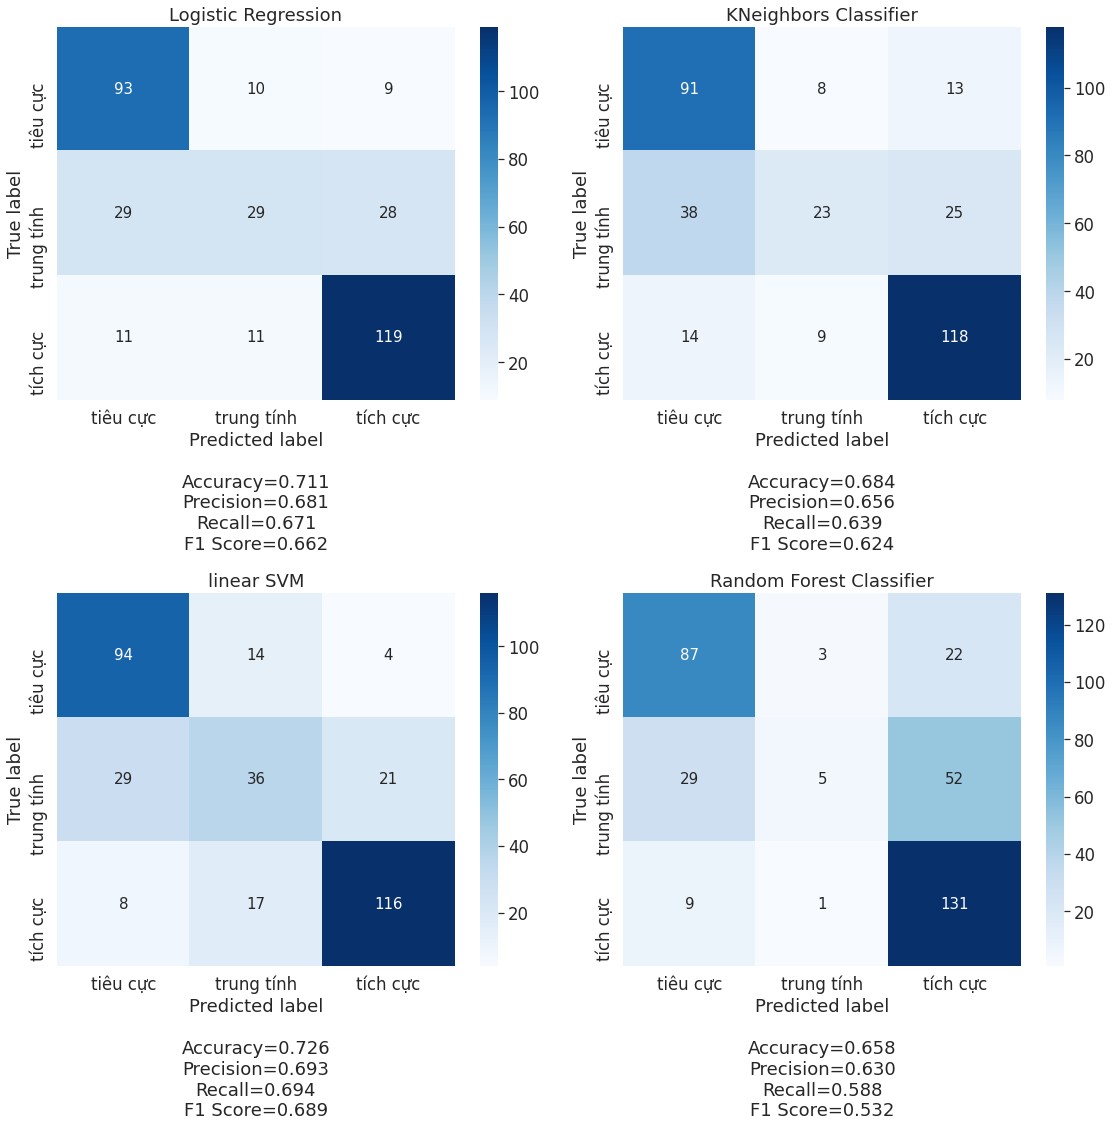

In [14]:
COL = 2
ROW = 2
categories = ['tiêu cực', 'trung tính', 'tích cực']


sns.set(font_scale=1.5)
plt.figure(figsize=(COL * 8, ROW * 8))
plt.subplot(ROW, COL, 1)
makeConfusionMatrix(LR_clf, X_test, Y_test, categories,
                    title='Logistic Regression')
plt.subplot(ROW, COL, 2)
makeConfusionMatrix(kNN_clf, X_test, Y_test, categories,
                    title='KNeighbors Classifier')
plt.subplot(ROW, COL, 3)
makeConfusionMatrix(linearSVM_clf, X_test, Y_test,
                    categories, title='linear SVM')
plt.subplot(ROW, COL, 4)
makeConfusionMatrix(RF_clf, X_test, Y_test, categories,
                    title='Random Forest Classifier')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()